In [16]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'./../../../sfmbv')

import seba
import methods
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import numpy as np
import betterspy

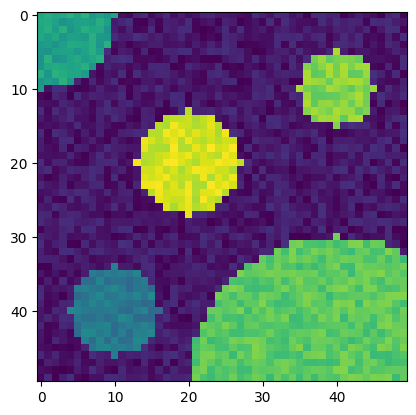

In [17]:
img_array, sh = methods.dots_2d(noise=40)
# img_array, sh = methods.pd()

mask_array = None
# mask_array = img_array > 0

plt.imshow(img_array)

In [18]:
wf = methods.WeightKernel(
    dist_sig = 1,
    intensity_sig = 40
)

# problem with mask?
G = methods.ImageGraph(
    img_array, 
    mask_array=mask_array, 
    wf=wf, 
    neighbour_depth = 1, 
    cmap='viridis'
    )

nx.write_gexf(G, 'raw.gexf')
print(len(G.edges))

4900


In [19]:
G._create_zero_node(zero_node_threshold=5)
print(len(G.edges))

5432


In [20]:
nx.write_gexf(G, 'zero-node.gexf')

In [21]:
P = nx.normalized_laplacian_matrix(G)
P_shift = scipy.sparse.identity(P.shape[0]) - P

In [22]:
vals, vecs = scipy.sparse.linalg.eigs(P,which='SM')

In [23]:
# vecs[:,0]
plot_array = G._node_vec_to_img_array(np.real(vecs[:,1]))

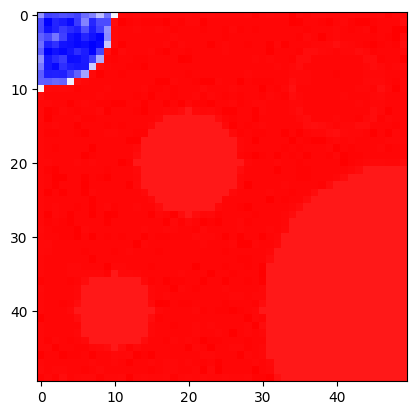

In [24]:
plt.imshow(plot_array, cmap='bwr')

In [25]:
from sklearn.cluster import KMeans

cluster_num = 6

kmeans = KMeans(n_clusters=cluster_num, random_state=0, n_init="auto").fit(np.real(vecs))
labels = kmeans.labels_+1

plot_labels = G._node_vec_to_img_array(labels)



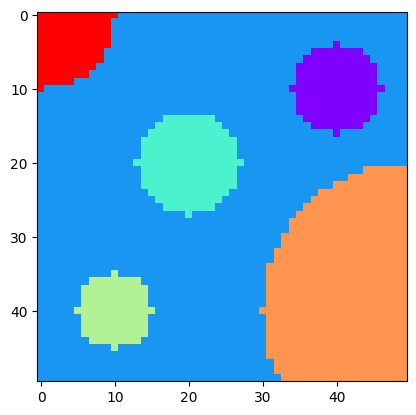

In [26]:
plt.imshow(plot_labels,cmap='rainbow')

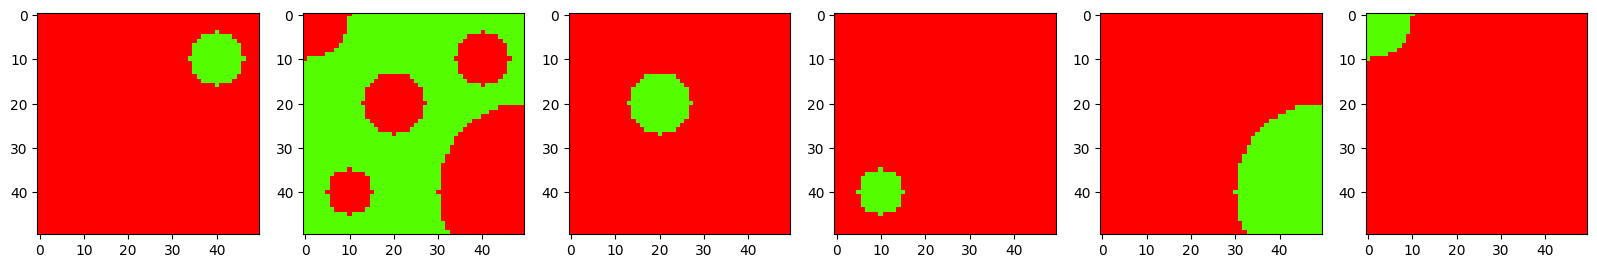

In [27]:
fig, axs = plt.subplots(1, cluster_num) 
fig.set_figheight(4)
fig.set_figwidth(20)

for i in range(1,cluster_num+1):
    curr = plot_labels == i
    axs[i-1].imshow(curr, cmap='prism')

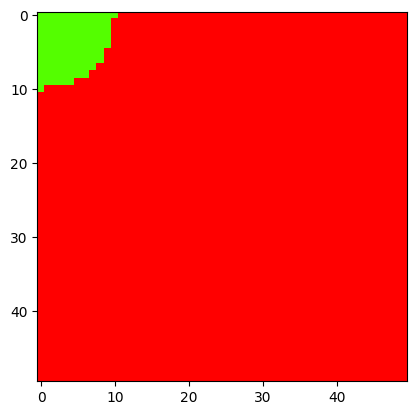

In [28]:
plt.imshow(plot_labels==6, cmap='prism')

In [29]:
# SEBA

S, R = seba.SEBA(np.real(vecs)[:,:])

AttributeError: module 'methods' has no attribute 'seba'

/Users/jackh/opt/anaconda3/envs/gordon_original/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


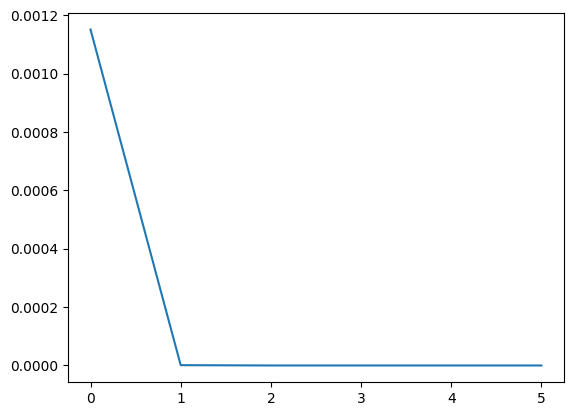

In [ ]:
plt.plot(vals)

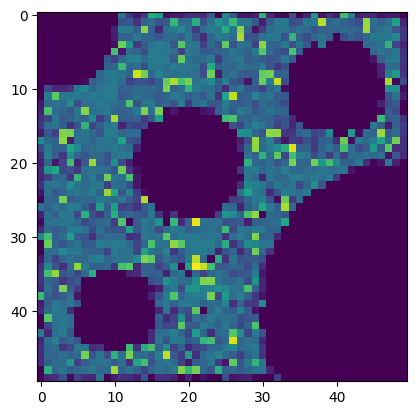

In [ ]:
seba_array = G._node_vec_to_img_array(np.real(S[:,4]))
plt.imshow(seba_array)

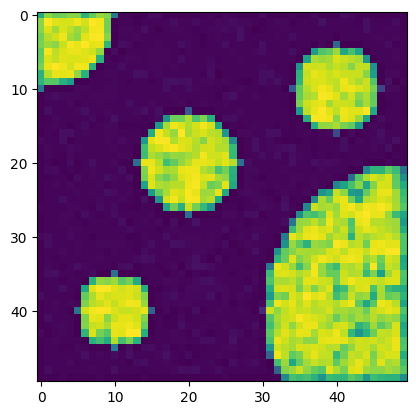

In [ ]:
seba_sum_array = G._node_vec_to_img_array(np.sum(np.real(S[:,:6]), axis=1))
plt.imshow(seba_sum_array)